In [48]:
from datasets import load_dataset

ds = load_dataset("flaviagiammarino/vqa-rad")

print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 1793
    })
    test: Dataset({
        features: ['image', 'question', 'answer'],
        num_rows: 451
    })
})


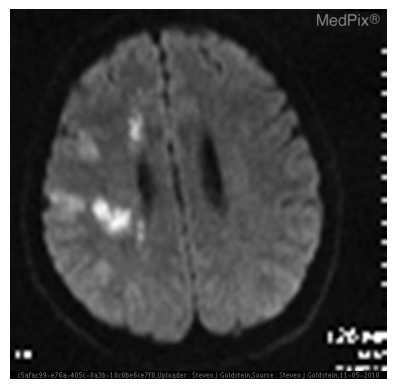

In [49]:
import matplotlib.pyplot as plt

img = ds["train"]["image"][0]  # PIL image from your dataset
plt.imshow(img)
plt.axis("off")
plt.show()


In [50]:
print(ds["train"]["question"][0])
print(ds["train"]["answer"][0])


are regions of the brain infarcted?
yes


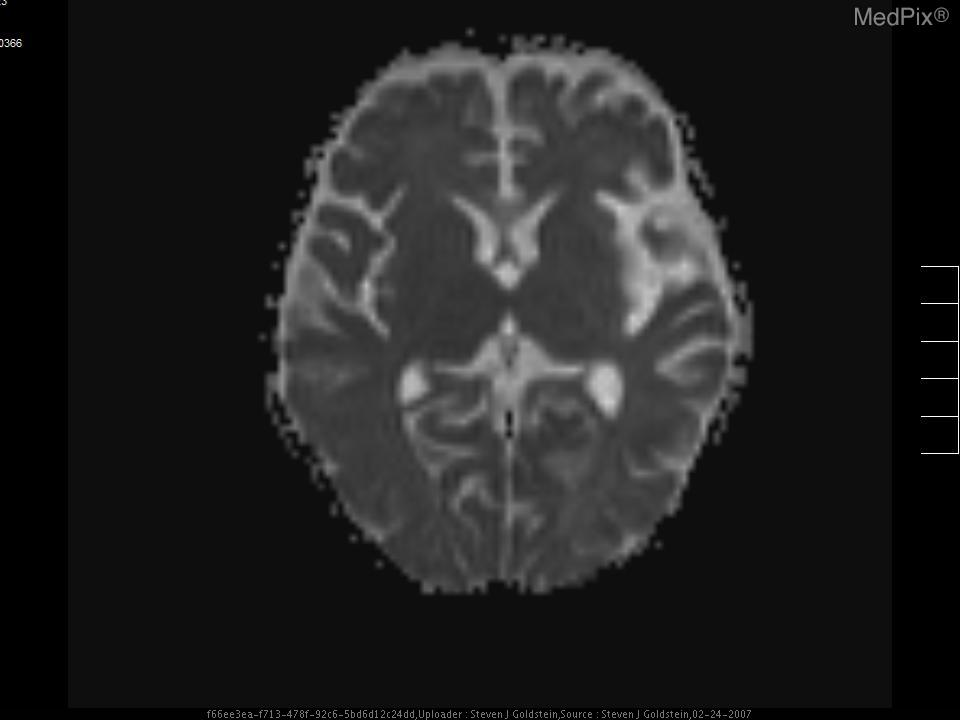

In [51]:
ds["train"][1000]['image']


In [52]:
{"messages": [{"role": "user", "content": "<image><image>What is the difference between the two images?"}, {"role": "assistant", "content": "The first one is a kitten, and the second one is a puppy."}], "images": ["/xxx/x.jpg", "/xxx/x.png"]}

{'messages': [{'role': 'user',
   'content': '<image><image>What is the difference between the two images?'},
  {'role': 'assistant',
   'content': 'The first one is a kitten, and the second one is a puppy.'}],
 'images': ['/xxx/x.jpg', '/xxx/x.png']}

In [53]:
from pathlib import Path
import json
from datasets import load_dataset

def convert_vqa_rad_to_messages(output_dir = "converted_vqa_rad", val_ration=0.1, seed=42):
    ds = load_dataset("flaviagiammarino/vqa-rad")

    train_val = ds["train"].train_test_split(test_size=val_ration, seed=seed)
    splits = {
        "train": train_val["train"],
        "val": train_val["test"],
        "test": ds["test"],
    }

    root = Path(output_dir)
    for split_name, split_ds in splits.items():
        split_dir = root / split_name
        img_dir = split_dir / "images"
        img_dir.mkdir(parents=True,exist_ok=True)

    for split_name, split_ds in splits.items():
        split_dir = root / split_name
        img_dir = split_dir / "images"
        img_dir.mkdir(parents=True,exist_ok=True)

        jsonl_path = split_dir / f"{split_name}.jsonl"
        with open(jsonl_path, "w", encoding="utf-8") as f:
            for idx, row in enumerate(split_ds):
                img_path = img_dir / f"{split_name}_{idx:05d}.jpg"
                row["image"].save(img_path, format="JPEG")

                obj = {
                    "messages": [
                        {"role": "user", "content": "<image>\n" + row["question"].strip()},
                        {"role":"assistant", "content": row["answer"].strip()},
                    ],
                    "images": ["converted_vqa_rad/" + f"{split_name}/" + str(Path("images") / img_path.name)],
                }
                f.write(json.dumps(obj, ensure_ascii=False) + "\n")
            print(f"Wrote {len(split_ds)} samples to {jsonl_path}")


In [54]:
convert_vqa_rad_to_messages()

Wrote 1613 samples to converted_vqa_rad/train/train.jsonl
Wrote 180 samples to converted_vqa_rad/val/val.jsonl
Wrote 451 samples to converted_vqa_rad/test/test.jsonl
